# CREDIT RISK ANALYSIS

In [1]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
#IMPORTING DATASET
df= pd.read_csv('german_credit_data.csv',index_col=0)
print(df.shape)
print(df.info())

(1000, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None


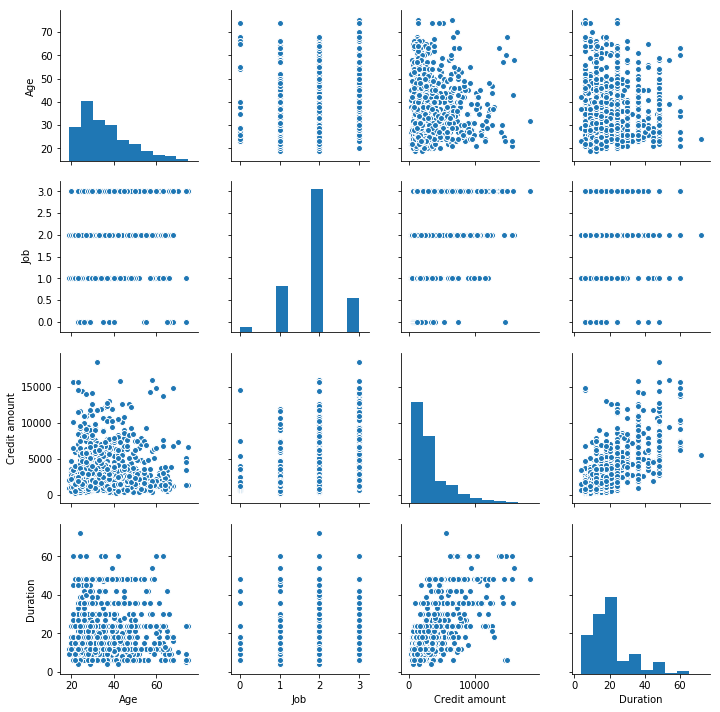

In [4]:
sns.pairplot(df)

In [6]:
#DEFINING FUNCTION FOR OUTLIERS

def outliers(x):
    quartile_1, quartile_3 = np.percentile(x, [25, 75])
    IQR = quartile_3 - quartile_1
    lower_bound = quartile_1 - (IQR * 1.5)
    upper_bound = quartile_3 + (IQR * 1.5)
    return np.where((x > upper_bound) | (x < lower_bound))

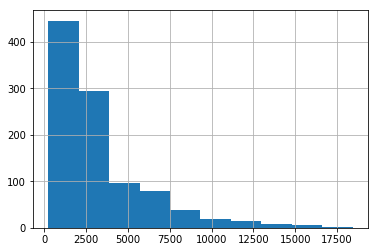

In [7]:
#OBSERVING CREDIT AMOUNT
df['Credit amount'].hist()

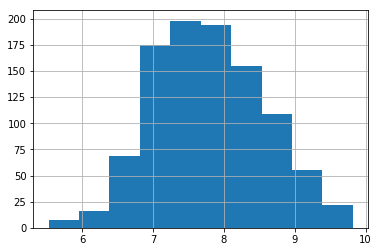

In [8]:
#NORMALISING THE CREDIT AMOUNT HIST
df['Credit amount_log'] = np.log(df['Credit amount'])
df['Credit amount_log'].hist()

In [9]:

df.describe()

,Age,Job,Credit amount,Duration,Credit amount_log
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000,7.788691
std,11.375469,0.653614,2822.736876,12.058814,0.776474
min,19.000000,0.000000,250.000000,4.000000,5.521461
25%,27.000000,2.000000,1365.500000,12.000000,7.219276
50%,33.000000,2.000000,2319.500000,18.000000,7.749107
75%,42.000000,2.000000,3972.250000,24.000000,8.287088
max,75.000000,3.000000,18424.000000,72.000000,9.821409


In [10]:
#listing all the column namews
cols=df.columns.tolist()
cols

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk',
 'Credit amount_log']

In [11]:
#rearranging the cols(y-target value)
cols = cols[-1:] + cols[:-1]
cols

['Credit amount_log',
 'Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk']

In [14]:
df=df[cols]
df.head()

,Credit amount_log,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,7.063904,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,8.691315,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,7.647786,49,male,1,own,little,NaN,2096,12,education,good
3,8.972337,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,8.490849,53,male,2,free,little,little,4870,24,car,bad


In [15]:
#checking the null data
df.isnull().sum()

Credit amount_log      0
Age                    0
Sex                    0
Job                    0
Housing                0
Saving accounts      183
Checking account     394
Credit amount          0
Duration               0
Purpose                0
Risk                   0
dtype: int64

In [18]:
#checking fields under each non numerical feature
print("Purpose : ",df.Purpose.unique())
print("Job : ",df.Job.unique())
print("Sex : ",df.Sex.unique())
print("Housing : ",df.Housing.unique())
print("Saving accounts : ",df['Saving accounts'].unique())
print("Checking account : ",df['Checking account'].unique())
print("Risk : ",df['Risk'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Job :  [2 1 3 0]
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account :  ['little' 'moderate' nan 'rich']
Risk :  ['good' 'bad']


In [19]:
print("Saving accounts : ",df['Saving accounts'].value_counts())
print("Checking account : ",df['Checking account'].value_counts())

Saving accounts :  little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
Checking account :  little      274
moderate    269
rich         63
Name: Checking account, dtype: int64


EDA

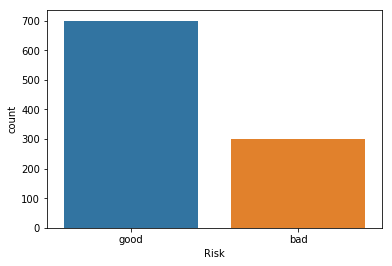

In [23]:
sns.countplot('Risk', data=df)


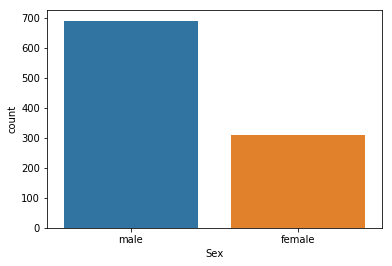

In [22]:
sns.countplot('Sex', data=df)

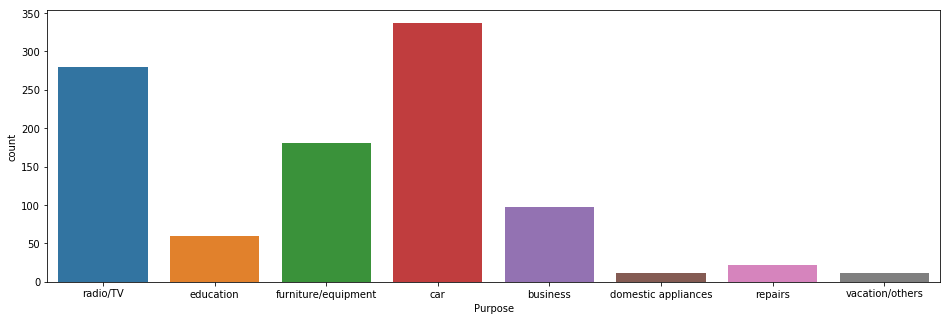

In [37]:
dimension = (16,5)
fig, ax = plt.subplots(figsize=dimension)
sns.countplot('Purpose', data=df)

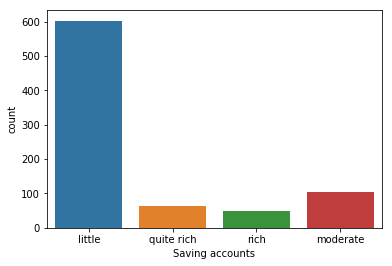

In [27]:
sns.countplot('Saving accounts', data=df)

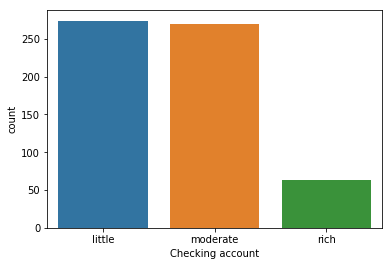

In [28]:
sns.countplot('Checking account', data=df)

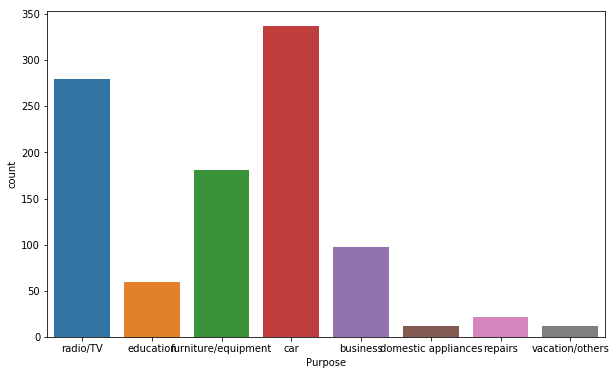

In [39]:
#GIVING THE DIMENSION FOR THE GRAPH
dimension = (10, 6)
fig, ax = plt.subplots(figsize=dimension)
#PLOTTING THE COUNT PLOT
sns.countplot('Purpose', data=df)

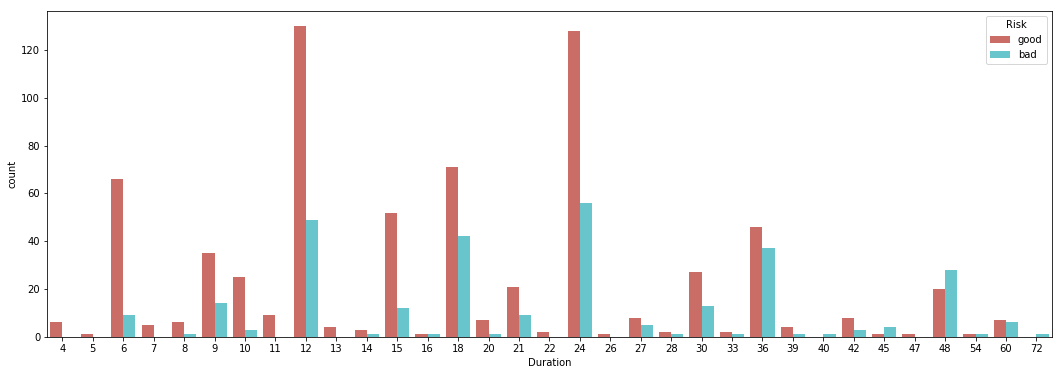

In [51]:
dimension = (18, 6)
fig, ax = plt.subplots(figsize=dimension)
sns.countplot(x="Duration", data=df, 
              palette="hls",  hue = "Risk")

In [54]:
category = ["Checking account", 'Sex']
cm = sns.light_palette("blue", as_cmap=True)
pd.crosstab(df[category[0]],df[category[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Checking account,,
little,88,186
moderate,86,183
rich,20,43


In [57]:
category = ["Saving accounts", 'Sex']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(df[category[0]],df[category[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Saving accounts,,
little,194,409
moderate,32,71
quite rich,16,47
rich,19,29


In [59]:
category = ["Purpose", 'Sex']
cm = sns.light_palette("yellow", as_cmap=True)
pd.crosstab(df[category[0]], df[category[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Purpose,,
business,19,78
car,94,243
domestic appliances,6,6
education,24,35
furniture/equipment,74,107
radio/TV,85,195
repairs,5,17
vacation/others,3,9


In [60]:
category = ["Sex", 'Risk']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(df[category[0]], df[category[1]]).style.background_gradient(cmap = cm)

Risk,bad,good
Sex,,
female,109,201
male,191,499


In [62]:
category = ["Housing",'Sex']
cm = sns.light_palette("pink", as_cmap=True)
pd.crosstab(df[category[0]], df[category[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Housing,,
free,19,89
own,196,517
rent,95,84


In [63]:
category = ["Job",'Sex']
cm = sns.light_palette("violet", as_cmap=True)
pd.crosstab(df[category[0]], df[category[1]]).style.background_gradient(cmap = cm)

Sex,female,male
Job,,
0,12,10
1,64,136
2,197,433
3,37,111


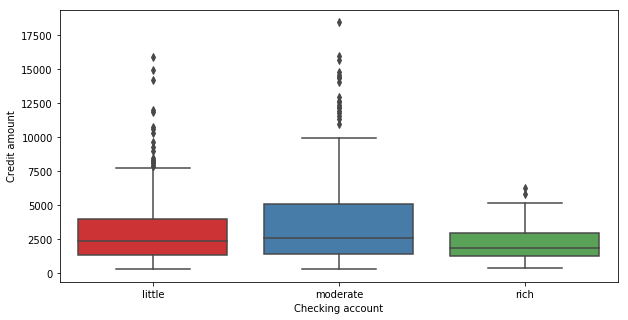

In [66]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x='Checking account', y='Credit amount', hue=None, data=df, palette='Set1')

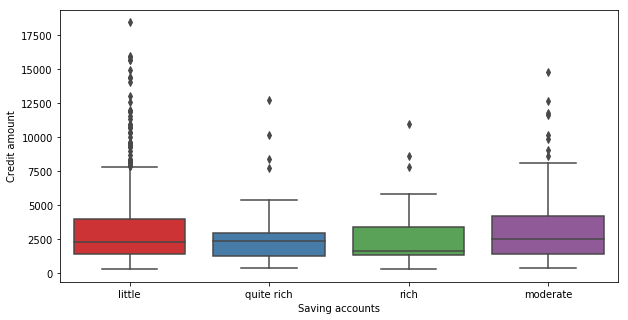

In [68]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x='Saving accounts', y='Credit amount', hue=None, data=df, palette='Set1')

In [73]:

df.fillna('little',inplace=True)

In [75]:
print("Saving account : ",df['Saving accounts'].value_counts())
print("Checking account : ",df['Checking account'].value_counts())

Saving account :  little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
Checking account :  little      668
moderate    269
rich         63
Name: Checking account, dtype: int64


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
Credit amount_log    1000 non-null float64
Age                  1000 non-null int64
Sex                  1000 non-null object
Job                  1000 non-null int64
Housing              1000 non-null object
Saving accounts      1000 non-null object
Checking account     1000 non-null object
Credit amount        1000 non-null int64
Duration             1000 non-null int64
Purpose              1000 non-null object
Risk                 1000 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 133.8+ KB


In [78]:
df.describe()

,Credit amount_log,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.788691,35.546000,1.904000,3271.258000,20.903000
std,0.776474,11.375469,0.653614,2822.736876,12.058814
min,5.521461,19.000000,0.000000,250.000000,4.000000
25%,7.219276,27.000000,2.000000,1365.500000,12.000000
50%,7.749107,33.000000,2.000000,2319.500000,18.000000
75%,8.287088,42.000000,2.000000,3972.250000,24.000000
max,9.821409,75.000000,3.000000,18424.000000,72.000000


In [81]:
##MODEL BUILDING

features = df.iloc[:,:10]
risk= df.iloc[:,[-1]]

In [82]:
features.head()

,Credit amount_log,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,7.063904,67,male,2,own,little,little,1169,6,radio/TV
1,8.691315,22,female,2,own,little,moderate,5951,48,radio/TV
2,7.647786,49,male,1,own,little,little,2096,12,education
3,8.972337,45,male,2,free,little,little,7882,42,furniture/equipment
4,8.490849,53,male,2,free,little,little,4870,24,car


In [84]:
risk.head()

,Risk
0,good
1,bad
2,good
3,good
4,bad


In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
##ENCODING - ALLOTTING NUMERIC VALUES
SexinNumeric=LabelEncoder()
HousinginNumeric=LabelEncoder()
SavingaccountinNumeric=LabelEncoder()
CheckingaccountinNumeric=LabelEncoder()
PurposeinNumeric=LabelEncoder()
RiskinNumeric=LabelEncoder()

In [88]:
features['SexinNumeric']=SexinNumeric.fit_transform(features['Sex'])
features['HousinginNumeric']=HousinginNumeric.fit_transform(features['Housing'])
features['SavingaccountinNumeric']=SavingaccountinNumeric.fit_transform(features['Saving accounts'])
features['CheckingaccountinNumeric']=CheckingaccountinNumeric.fit_transform(features['Checking account'])
features['PurposeinNumeric']=PurposeinNumeric.fit_transform(features['Purpose'])
label['RiskinNumeric']=RiskinNumeric.fit_transform(label['Risk'])

In [89]:
features.tail()

,Credit amount_log,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,SexinNumeric,HousinginNumeric,SavingaccountinNumeric,CheckingaccountinNumeric,PurposeinNumeric
995,7.459339,31,female,1,own,little,little,1736,12,furniture/equipment,0,1,0,0,4
996,8.257645,40,male,3,own,little,little,3857,30,car,1,1,0,0,1
997,6.689599,38,male,2,own,little,little,804,12,radio/TV,1,1,0,0,5
998,7.520235,23,male,2,free,little,little,1845,45,radio/TV,1,0,0,0,5
999,8.428581,27,male,2,own,moderate,moderate,4576,45,car,1,1,1,1,1


In [90]:
label.tail()

,Risk,RiskinNumeric
995,good,1
996,good,1
997,good,1
998,bad,0
999,good,1


In [92]:
#dropping off the categorical variables
NewFeatures = features.drop(['Sex','Housing','Saving accounts','Checking account', 'Purpose'], axis='columns')
NewLabel = label.drop(['Risk'], axis='columns')

In [93]:
NewFeatures.head()

,Credit amount_log,Age,Job,Credit amount,Duration,SexinNumeric,HousinginNumeric,SavingaccountinNumeric,CheckingaccountinNumeric,PurposeinNumeric
0,7.063904,67,2,1169,6,1,1,0,0,5
1,8.691315,22,2,5951,48,0,1,0,1,5
2,7.647786,49,1,2096,12,1,1,0,0,3
3,8.972337,45,2,7882,42,1,0,0,0,4
4,8.490849,53,2,4870,24,1,0,0,0,1


In [94]:
NewLabel.head()

,RiskinNumeric
0,1
1,0
2,1
3,1
4,0


In [96]:
NewFeatures = features.drop(['Sex','Housing','Saving accounts', 'Checking account', 'Purpose'], axis='columns').values
NewLabel = label.drop(['Risk'], axis='columns').values

In [99]:
len(NewFeatures)

1000

In [100]:
len(NewLabel)

1000

In [101]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(NewFeatures,NewLabel,test_size=0.20,random_state=33)

In [102]:
print(f'X_train dimension: {X_train.shape}')
print(f'X_test dimension: {X_test.shape}')
print(f'\ny_train dimension: {y_train.shape}')
print(f'y_test dimension: {y_test.shape}')

X_train dimension: (800, 10)
X_test dimension: (200, 10)

y_train dimension: (800, 1)
y_test dimension: (200, 1)


In [103]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [104]:
model.score(X_train,y_train)

0.72

In [105]:
model.score(X_test,y_test)

0.655

In [106]:
ypred=model.predict(X_test)

In [108]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ypred, y_test))

0.655


In [109]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ypred,y_test)
CM

array([[  5,   3],
       [ 66, 126]], dtype=int64)

Text(33,0.5,'actual')

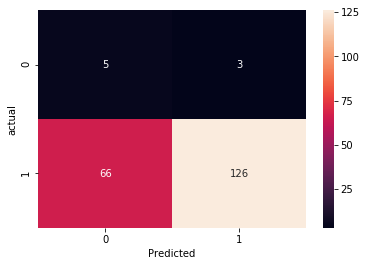

In [110]:
sns.heatmap(CM, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('actual')

In [111]:
from sklearn.metrics import classification_report
print(classification_report(ypred,y_test))

             precision    recall  f1-score   support

          0       0.07      0.62      0.13         8
          1       0.98      0.66      0.79       192

avg / total       0.94      0.66      0.76       200



DECISION TREE

In [113]:
from sklearn import tree

In [115]:
model2 = tree.DecisionTreeClassifier()
model2=model2.fit(X_train,y_train)

In [116]:
ypred2=model2.predict(X_test)

In [117]:
from sklearn.metrics import confusion_matrix
CM2 = confusion_matrix(ypred2,y_test)
CM2

array([[32, 34],
       [39, 95]], dtype=int64)

Text(33,0.5,'actual')

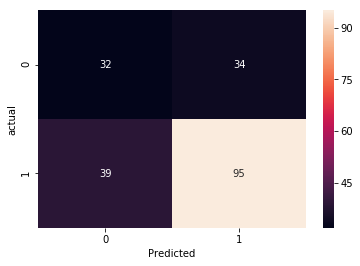

In [118]:
sns.heatmap(CM2, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('actual')

In [119]:
print(classification_report(ypred2,y_test))

             precision    recall  f1-score   support

          0       0.45      0.48      0.47        66
          1       0.74      0.71      0.72       134

avg / total       0.64      0.64      0.64       200

